In [1]:
import pickle
from pathlib import Path
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
import seaborn as sns

plt.style.use("seaborn")
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
## Config, copied form results_*/tests.py
n_ants = [10, 20, 33]
alphas = [1, 2, 4, 5]
rhos = [0.05, 0.1, 0.25, 0.3]

<IPython.core.display.Javascript object>

## Read files

### Normal

In [3]:
FILENAME_33 = Path().resolve() / "results_1586779168" / "save.pkl"
FILENAME_51 = Path().resolve() / "results_1586816093" / "save.pkl"
FILENAME_76 = Path().resolve() / "results_1586816260" / "save.pkl"
with open(FILENAME_33, "rb") as f:
    d_33 = pickle.load(f)
with open(FILENAME_51, "rb") as f:
    d_51 = pickle.load(f)
with open(FILENAME_76, "rb") as f:
    d_76 = pickle.load(f)

assert d_33.keys()
assert d_51.keys()
assert d_76.keys()

<IPython.core.display.Javascript object>

### Greedy

In [4]:
FILENAME_GREEDY_33 = Path().resolve() / "results_1586885532" / "save.pkl"
FILENAME_GREEDY_51 = Path().resolve() / "results_1586885802" / "save.pkl"
FILENAME_GREEDY_76 = Path().resolve() / "results_1586886456" / "save.pkl"
with open(FILENAME_GREEDY_33, "rb") as f:
    dg_33 = pickle.load(f)[("baseline", 20, 2, 0.25)]
with open(FILENAME_GREEDY_51, "rb") as f:
    dg_51 = pickle.load(f)[("baseline", 20, 2, 0.25)]
with open(FILENAME_GREEDY_76, "rb") as f:
    dg_76 = pickle.load(f)[("baseline", 20, 2, 0.25)]

assert dg_33
assert dg_51
assert dg_76

<IPython.core.display.Javascript object>

## Utils

In [5]:
def best_score_from_history(arr: np.ndarray) -> List[float]:
    best = arr[0]
    result = []
    for i in arr:
        if i < best:
            best = i
        result.append(best)
    return result

<IPython.core.display.Javascript object>

In [6]:
@dataclass
class Task:
    data: np.ndarray
    greedy_data: np.ndarray
    name: str

<IPython.core.display.Javascript object>

In [7]:
tasks = [
    Task(d_33, dg_33, "E-n33-k4"),
    Task(d_51, dg_51, "E-n51-k5"),
    Task(d_76, dg_76, "E-n76-k10"),
]

<IPython.core.display.Javascript object>

# Plot

## 1. Number of ants on different problems

In [8]:
case1 = [("baseline", n, 2, 0.25) for n in n_ants]

<IPython.core.display.Javascript object>

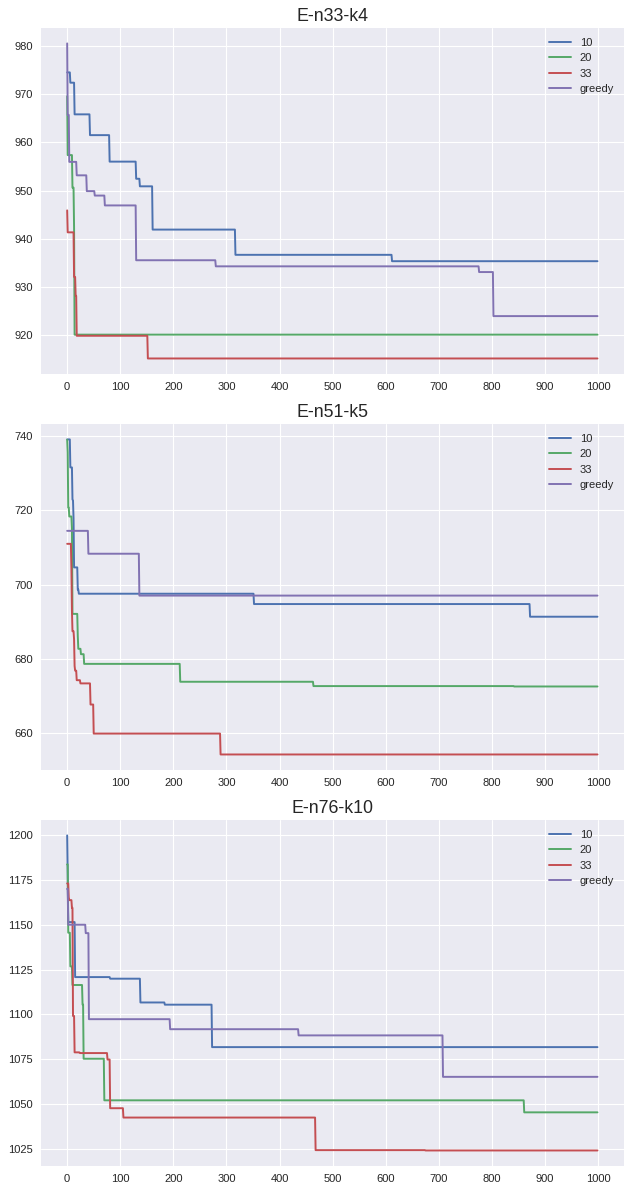

<IPython.core.display.Javascript object>

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(
    3, figsize=(8, 15), dpi=80, facecolor="w", edgecolor="k"
)
axes = [ax1, ax2, ax3]

for task, ax in zip(tasks, axes):
    for case in case1:
        curr_data = best_score_from_history(task.data[case][1])
        ax.plot(curr_data, label=str(case[1]))
    greedy_data = best_score_from_history(task.greedy_data[1])
    ax.plot(greedy_data, label="greedy")

    ax.legend(loc="upper right")
    ax.xaxis.set_ticks(np.arange(0, len(curr_data) + 1, 100))
    ax.set_title(task.name, fontsize=16)

fig.tight_layout()
# fig.suptitle("Comparing different number of ants", fontsize=20, y=0.95)
fig.savefig("number-of-ants.svg", dpi=fig.dpi)

## 2. Alphas

In [11]:
case2 = [("baseline", 20, n, 0.25) for n in alphas]

<IPython.core.display.Javascript object>

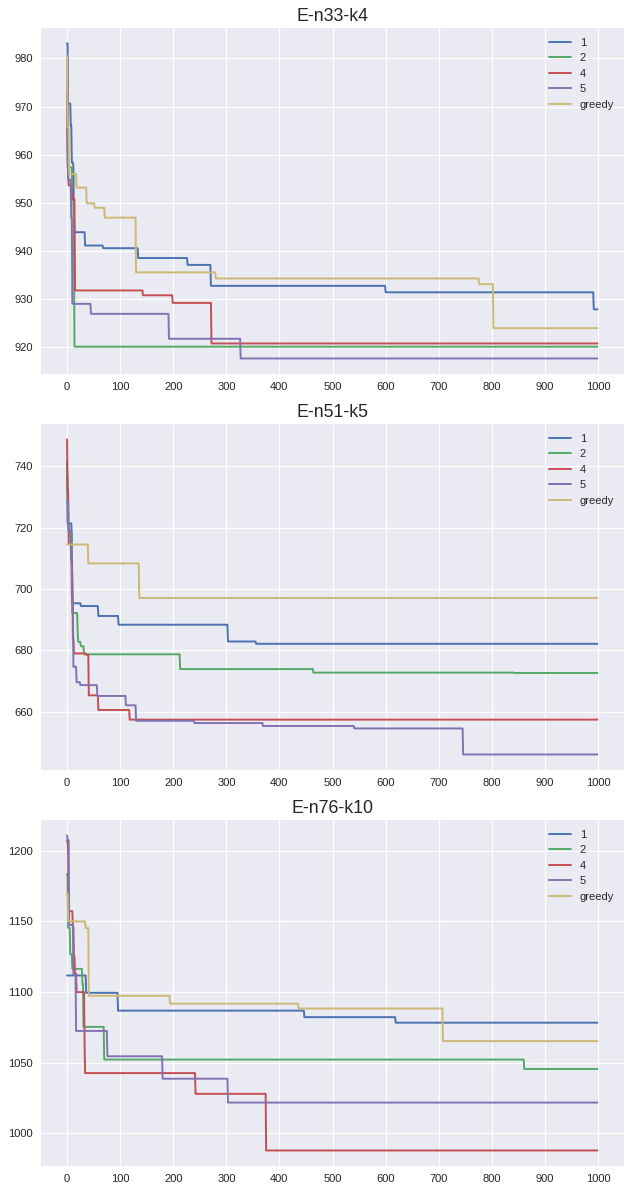

<IPython.core.display.Javascript object>

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(
    3, figsize=(8, 15), dpi=80, facecolor="w", edgecolor="k"
)
axes = [ax1, ax2, ax3]
for task, ax in zip(tasks, axes):
    for case in case2:
        curr_data = best_score_from_history(task.data[case][1])
        ax.plot(curr_data, label=str(case[2]))

    greedy_data = best_score_from_history(task.greedy_data[1])
    ax.plot(greedy_data, label="greedy")
    ax.legend(loc="upper right")
    ax.xaxis.set_ticks(np.arange(0, len(curr_data) + 1, 100))
    ax.set_title(task.name, fontsize=16)

fig.tight_layout()
# fig.suptitle("Comparing different alphas", fontsize=20, y=0.94)
fig.savefig("alphas.svg", dpi=fig.dpi)

## 3. rho

In [13]:
case3 = [("baseline", 20, 2, n) for n in rhos]

<IPython.core.display.Javascript object>

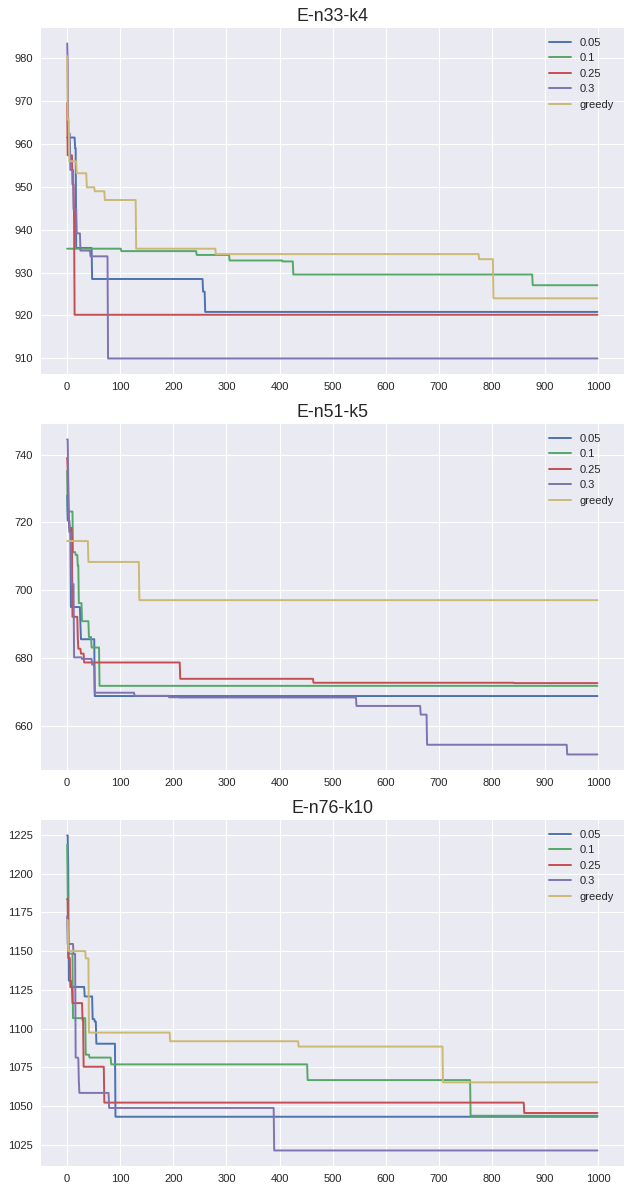

<IPython.core.display.Javascript object>

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(
    3, figsize=(8, 15), dpi=80, facecolor="w", edgecolor="k"
)
axes = [ax1, ax2, ax3]
for task, ax in zip(tasks, axes):
    for case in case3:
        curr_data = best_score_from_history(task.data[case][1])
        ax.plot(curr_data, label=str(case[3]))

    greedy_data = best_score_from_history(task.greedy_data[1])
    ax.plot(greedy_data, label="greedy")
    ax.legend(loc="upper right")
    ax.xaxis.set_ticks(np.arange(0, len(curr_data) + 1, 100))
    ax.set_title(task.name, fontsize=16)

fig.tight_layout()
# fig.suptitle("Comparing different rho", fontsize=20, y=0.94)
fig.savefig("rhos.svg", dpi=fig.dpi)

## 4. Candidate list

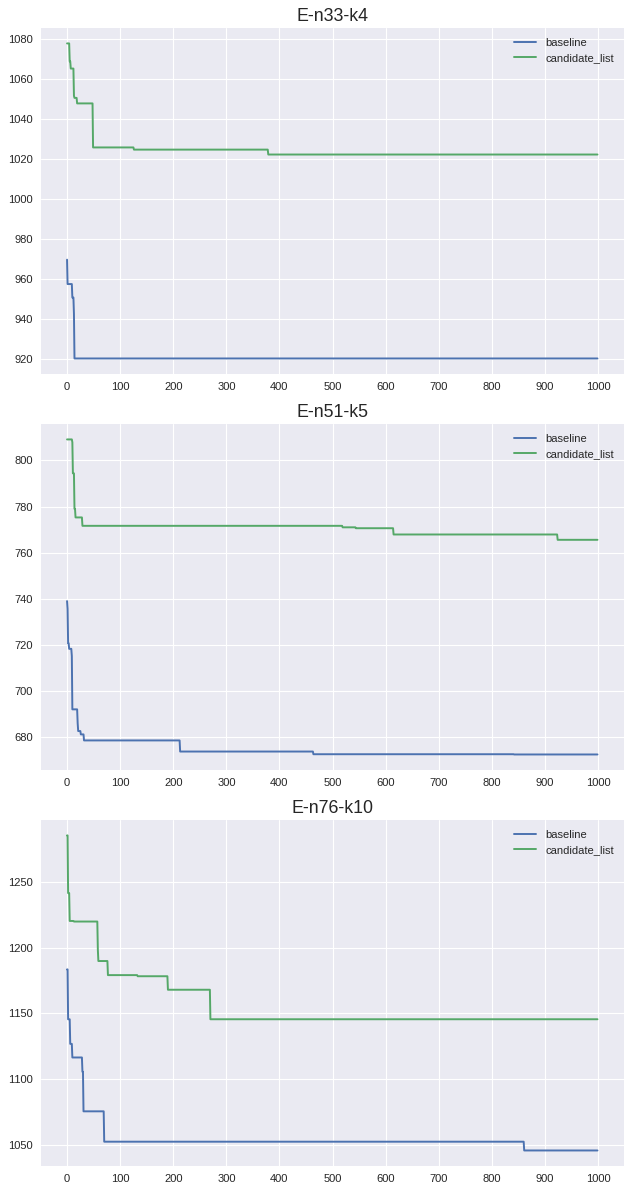

<IPython.core.display.Javascript object>

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(
    3, figsize=(8, 15), dpi=80, facecolor="w", edgecolor="k"
)
axes = [ax1, ax2, ax3]
for task, ax in zip(tasks, axes):
    baseline_data = best_score_from_history(task.data[("baseline", 20, 2, 0.25)][1])
    ax.plot(baseline_data, label="baseline")

    candidate_list_data = best_score_from_history(
        task.data[("candidate_list", 20, 2, 0.25)][1]
    )
    ax.plot(candidate_list_data, label="candidate_list")

    ax.legend(loc="upper right")
    ax.xaxis.set_ticks(np.arange(0, len(curr_data) + 1, 100))
    ax.set_title(task.name, fontsize=16)

# fig.suptitle("Candidate list vs reference", fontsize=20, y=0.94)
fig.tight_layout()
fig.savefig("candidate-vs-reference.svg", dpi=fig.dpi)

## 2 opt vs referencyjny

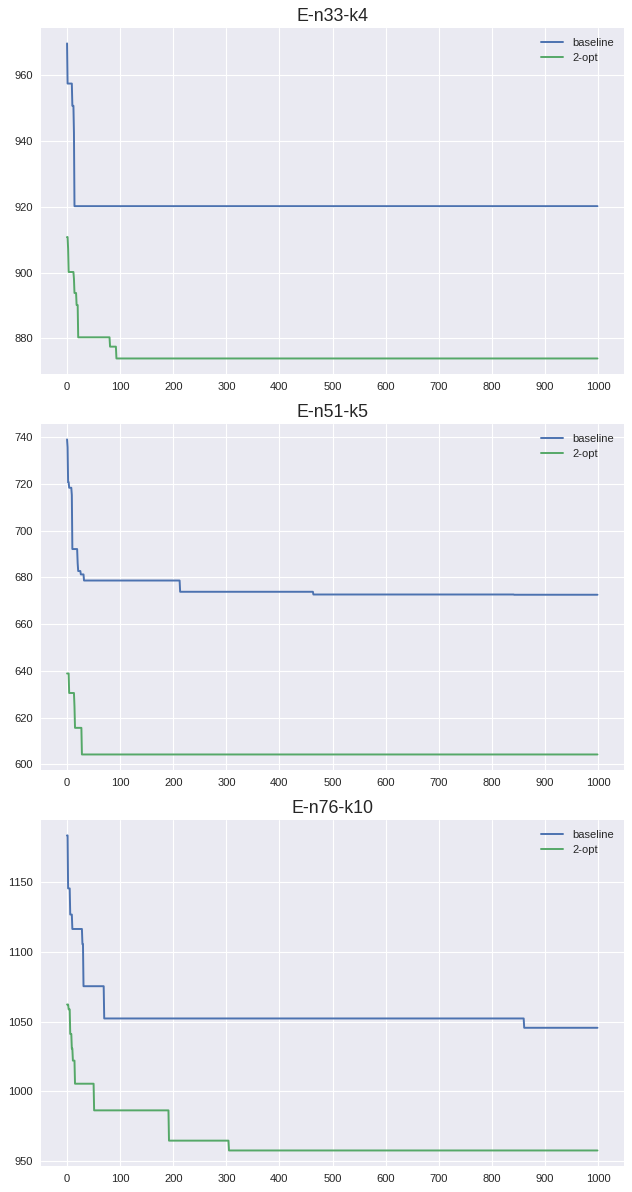

<IPython.core.display.Javascript object>

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(
    3, figsize=(8, 15), dpi=80, facecolor="w", edgecolor="k"
)
axes = [ax1, ax2, ax3]
for task, ax in zip(tasks, axes):
    baseline_data = best_score_from_history(task.data[("baseline", 20, 2, 0.25)][1])
    ax.plot(baseline_data, label="baseline")

    candidate_list_data = best_score_from_history(
        task.data[("two_opt", 20, 2, 0.25)][1]
    )
    ax.plot(candidate_list_data, label="2-opt")

    ax.legend(loc="upper right")
    ax.xaxis.set_ticks(np.arange(0, len(curr_data) + 1, 100))
    ax.set_title(task.name, fontsize=16)

# fig.suptitle("2opt vs reference", fontsize=20, y=0.94)
fig.tight_layout()
fig.savefig("2opt-vs-reference.svg", dpi=fig.dpi)

## Porównanie 3 metod względem siebie

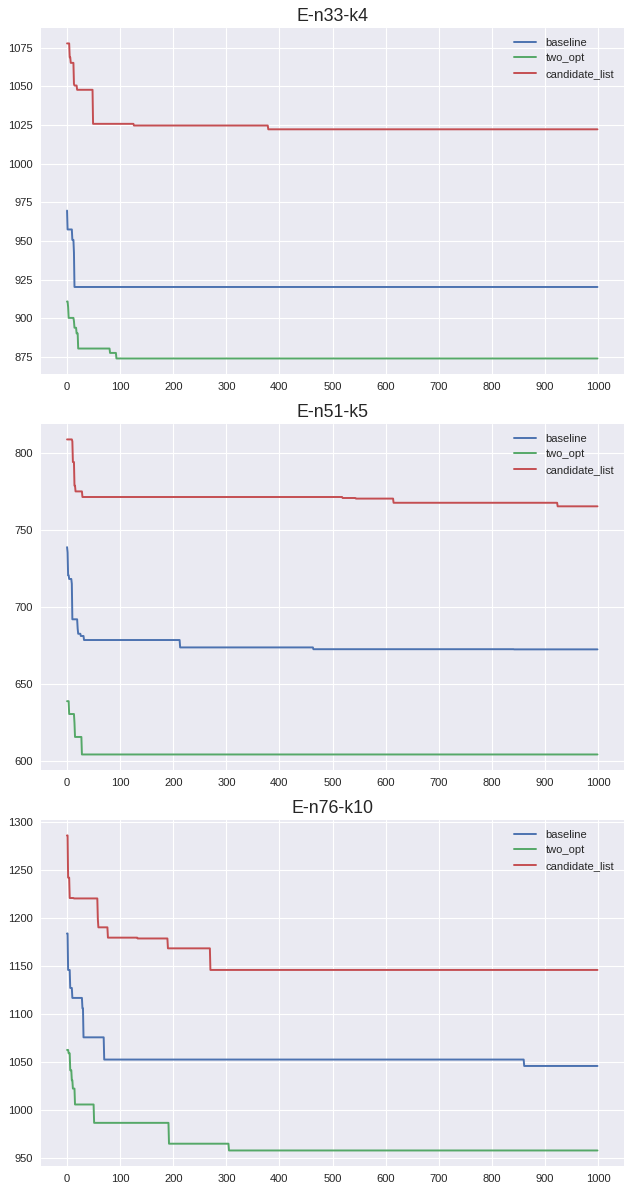

<IPython.core.display.Javascript object>

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(
    3, figsize=(8, 15), dpi=80, facecolor="w", edgecolor="k"
)
axes = [ax1, ax2, ax3]
for task, ax in zip(tasks, axes):
    baseline_data = best_score_from_history(task.data[("baseline", 20, 2, 0.25)][1])
    ax.plot(baseline_data, label="baseline")

    candidate_list_data = best_score_from_history(
        task.data[("two_opt", 20, 2, 0.25)][1]
    )
    ax.plot(candidate_list_data, label="two_opt")

    candidate_list_data = best_score_from_history(
        task.data[("candidate_list", 20, 2, 0.25)][1]
    )
    ax.plot(candidate_list_data, label="candidate_list")

    ax.legend(loc="upper right")
    ax.xaxis.set_ticks(np.arange(0, len(curr_data) + 1, 100))
    ax.set_title(task.name, fontsize=16)

fig.tight_layout()
fig.savefig("2opt-candidate-reference.svg", dpi=fig.dpi)

## Timing

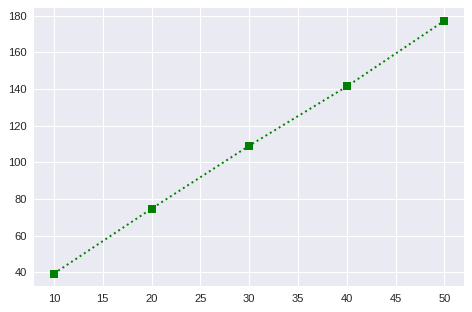

<IPython.core.display.Javascript object>

In [57]:
fig, ax = plt.subplots(1, figsize=(6, 4), dpi=80, facecolor="w", edgecolor="k")
ax.plot(
    [10, 20, 30, 40, 50],
    [39.36, 74.76, 109.09, 141.43, 177.34],
    linestyle=":",
    marker="s",
    color="g",
)
fig.tight_layout()
fig.savefig("ants-timing.svg", dpi=fig.dpi)

In [ ]:
tasks[1].data[("baseline", 20, 2, 0.25)][2]